# Hyperparameter tuning
This notebook tunes the Hyperparameters of the DMD variants (like the rank of the SVD, the time-delay embedding, etc.) using a brute force approach, due to the quickness of the training process.

In [2]:
import yaml
import os
import numpy as np

from IPython.display import clear_output as clc

class TuneDMDs:
    """
    Basic Class
    """
    def __init__(self, pair_id=None):
        if pair_id is None:
            self.pair_id = [1, 2, 3, 4, 5, 6, 7]
        else:
            self.pair_id = pair_id

    def _create_yaml(self, rank: int, filename: str):
        
        assert isinstance(rank, int), "Rank must be an integer"
        assert rank == -1 or rank >= 0, "Rank must be a positive integer or -1"

        data = {
            'dataset': {
                'name': 'PDE_KS',
                'pair_id': self.pair_id
            },
            'model': {
                'name': 'DMD',
                'method': 'classic',
                'rank': rank
            }
        }

        with open(filename, 'w') as f:
            yaml.dump(data, f, sort_keys=False)

    def _run_yaml(self, filename: str):
        """
        Run the yaml file
        """
        os.system(f"python ../run.py {filename}")

    def test_hp(self, ranks: list):
        """
        Test the hyperparameters
        """
        
        for r in ranks:
            filename = f"../config/HPTuning/ClassicDMD/tunedmd_rank_{r}.yaml"
            os.makedirs(os.path.dirname(filename), exist_ok=True)
            self._create_yaml(r, filename)

            self._run_yaml(filename)

            clc()


## Classic DMD
This is for non-parametric datasets (id from 1 to 7). The hyperparameters are:
- `rank`: the rank of the SVD

In [4]:
# import numpy as np

# ranks_to_test = np.arange(0, 401, 25)
# ranks_to_test = ranks_to_test.tolist()

# tune_dmd = TuneDMDvariants()
# tune_dmd.test_hp(ranks_to_test)

## High-Order DMD
This is for parametric datasets (id from 1 to 7). The hyperparameters are:
- `rank`: the rank of the SVD
- `time_delay`: the time-delay embedding

In [ ]:
# class TuneHankelDMD(TuneDMDvariants):
#     """
    
#     """
#     def __init__(self, pair_id=None):
#         if pair_id is None:
#             self.pair_id = [1, 2, 3, 4, 5, 6, 7]
#         else:
#             self.pair_id = pair_id

#     def _create_yaml(self, rank: int, delay: int, filename: str):
        
#         assert isinstance(rank, int), "Rank must be an integer"
#         assert rank == -1 or rank >= 0, "Rank must be a positive integer or -1"

#         assert isinstance(delay, int), "Delay must be an integer"
#         assert delay >= 0, "Delay must be a positive integer"

#         data = {
#             'dataset': {
#                 'name': 'PDE_KS',
#                 'pair_id': self.pair_id
#             },
#             'model': {
#                 'name': 'DMD',
#                 'method': 'highorder',
#                 'rank': rank,
#                 'delay': delay
#             }
#         }

#         with open(filename, 'w') as f:
#             yaml.dump(data, f, sort_keys=False)

#     def test_hp(self, ranks: list, delays: list):
#         """
#         Test the hyperparameters
#         """
        
#         for r in ranks:
#             for d in delays:
#                 filename = f"../config/HPTuning/HankelDMD/tunedmd_rank{r}_delay{d}.yaml"
#                 os.makedirs(os.path.dirname(filename), exist_ok=True)
#                 self._create_yaml(r, d, filename)

#                 self._run_yaml(filename)

#                 clc()
    
# tune_dmd = TuneHankelDMD()

# ranks = np.arange(200, 351, 25).tolist()
# delays = np.arange(30, 41, 5).tolist()

# tune_dmd.test_hp(ranks, delays)

## Optimised DMD
This is for parametric datasets (id from 1 to 7). The hyperparameters are:
- `rank`: the rank of the SVD
- `time_delay`: the time-delay embedding

(For the moment)

In [ ]:
class TuneOptDMD(TuneDMDs):
    """
    
    """
    def __init__(self, pair_id=None):
        if pair_id is None:
            self.pair_id = [1, 2, 3, 4, 5, 6, 7]
        else:
            self.pair_id = pair_id

    def _create_yaml(self, rank: int, delay: int, filename: str):
        
        assert isinstance(rank, int), "Rank must be an integer"
        assert rank == -1 or rank >= 0, "Rank must be a positive integer or -1"

        assert isinstance(delay, int), "Delay must be an integer"
        assert delay >= 0, "Delay must be a positive integer"

        data = {
            'dataset': {
                'name': 'PDE_KS',
                'pair_id': self.pair_id
            },
            'model': {
                'name': 'DMD',
                'method': 'bagopt',
                'rank': rank,
                'eig_constraints': ['stable'],
                'delay': delay,
            }
        }

        with open(filename, 'w') as f:
            yaml.dump(data, f, sort_keys=False)

    def test_hp(self, ranks: list, delays: list):
        """
        Test the hyperparameters
        """
        
        for r in ranks:
            for d in delays:
                filename = f"../config/HPTuning/OptDMD/tunedmd_rank{r}_delay{d}.yaml"
                os.makedirs(os.path.dirname(filename), exist_ok=True)
                self._create_yaml(r, d, filename)

                self._run_yaml(filename)

                clc()
    
tune_dmd = TuneOptDMD()

ranks = [20, 40, 60]
delays = [10,20,30]

tune_dmd.test_hp(ranks, delays)

Running bagoptDMD on PDE_KS pair 1
Saved psd plot to /Users/sriva/Github/CTF-for-Science/results/PDE_KS/bagoptDMD/batch_rank20_delay10_numtrials0_20250423_180505/pair1/visualizations/psd.png
Saved contour plot to /Users/sriva/Github/CTF-for-Science/results/PDE_KS/bagoptDMD/batch_rank20_delay10_numtrials0_20250423_180505/pair1/visualizations/contour.png
 
Running bagoptDMD on PDE_KS pair 2
Saved psd plot to /Users/sriva/Github/CTF-for-Science/results/PDE_KS/bagoptDMD/batch_rank20_delay10_numtrials0_20250423_180505/pair2/visualizations/psd.png
Saved contour plot to /Users/sriva/Github/CTF-for-Science/results/PDE_KS/bagoptDMD/batch_rank20_delay10_numtrials0_20250423_180505/pair2/visualizations/contour.png
 
Running bagoptDMD on PDE_KS pair 3
Saved psd plot to /Users/sriva/Github/CTF-for-Science/results/PDE_KS/bagoptDMD/batch_rank20_delay10_numtrials0_20250423_180505/pair3/visualizations/psd.png
Saved contour plot to /Users/sriva/Github/CTF-for-Science/results/PDE_KS/bagoptDMD/batch_rank20

## Post Processing and Plotting
Let us load the results

In [3]:
from pathlib import Path
from ctf4science.eval_module import extract_metrics_in_order

# Dataset name
dataset_name = "PDE_KS"

# Dictionary to store results for all batches
results = {}

baseline_batches = [
    "CTF_NaiveBaselines_average/batch_avg_20250423_162739/",
]

model_batches = sorted(os.listdir("../../../results/PDE_KS/highorderDMD/"))
model_batches = ['highorderDMD/'+batch for batch in model_batches]
_model_batches = sorted(os.listdir("../../../results/PDE_KS/bagoptDMD/"))
model_batches += ['bagoptDMD/'+batch for batch in _model_batches]

all_batches = baseline_batches + model_batches

for batch in all_batches:
    # Construct the path to batch_results.yaml
    batch_dir = Path("../../../results") / dataset_name / batch
    batch_results_path = batch_dir / "batch_results.yaml"
    
    # Load the batch_results.yaml file
    with open(batch_results_path, "r") as f:
        batch_results = yaml.safe_load(f)
    
    # Extract metric values in the correct order
    metric_values = extract_metrics_in_order(dataset_name, batch_results)
    
    # Map values to E1, E2, ..., E12
    e_metrics = {f"E{i+1}": value for i, value in enumerate(metric_values)}
    
    # Store the transformed metrics with the batch path as the key
    results[batch] = e_metrics

# Optional: Display the results to verify
for batch, metrics in results.items():
    print(f"Batch: {batch}")
    print(metrics)
    print()

Batch: CTF_NaiveBaselines_average/batch_avg_20250423_162739/
{'E1': -4.631336398781993, 'E2': 1.474626752441377, 'E3': 0.22272235606694002, 'E4': 1.214081593590377, 'E5': 2.6173207210912985, 'E6': 1.2701900910247477, 'E7': -0.5680211773671839, 'E8': 4.166696505654288, 'E9': -24.70958769561531, 'E10': 20.620923222521892}

Batch: highorderDMD/batch_rank200_delay40_20250423_164003
{'E1': -48.315934325631304, 'E2': -4969.287394503024, 'E3': 50.93447624818187, 'E4': 5.085882100564964, 'E5': 8.819378750725527, 'E6': 0.056727559123270765, 'E7': 18.300160984741254, 'E8': 0.0, 'E9': 10.236279839381135, 'E10': 0.0}

Batch: highorderDMD/batch_rank250_delay40_20250423_164212
{'E1': -72.25177818785625, 'E2': -5483.251982037252, 'E3': 56.82691432730502, 'E4': -168.09117497827347, 'E5': 9.167861458907344, 'E6': 0.056756431294613385, 'E7': 18.300160984741254, 'E8': 0.0, 'E9': 10.236279839381135, 'E10': 0.0}

Batch: highorderDMD/batch_rank300_delay40_20250423_164422
{'E1': -61.37985285185019, 'E2': -57

Let us make a spider plot

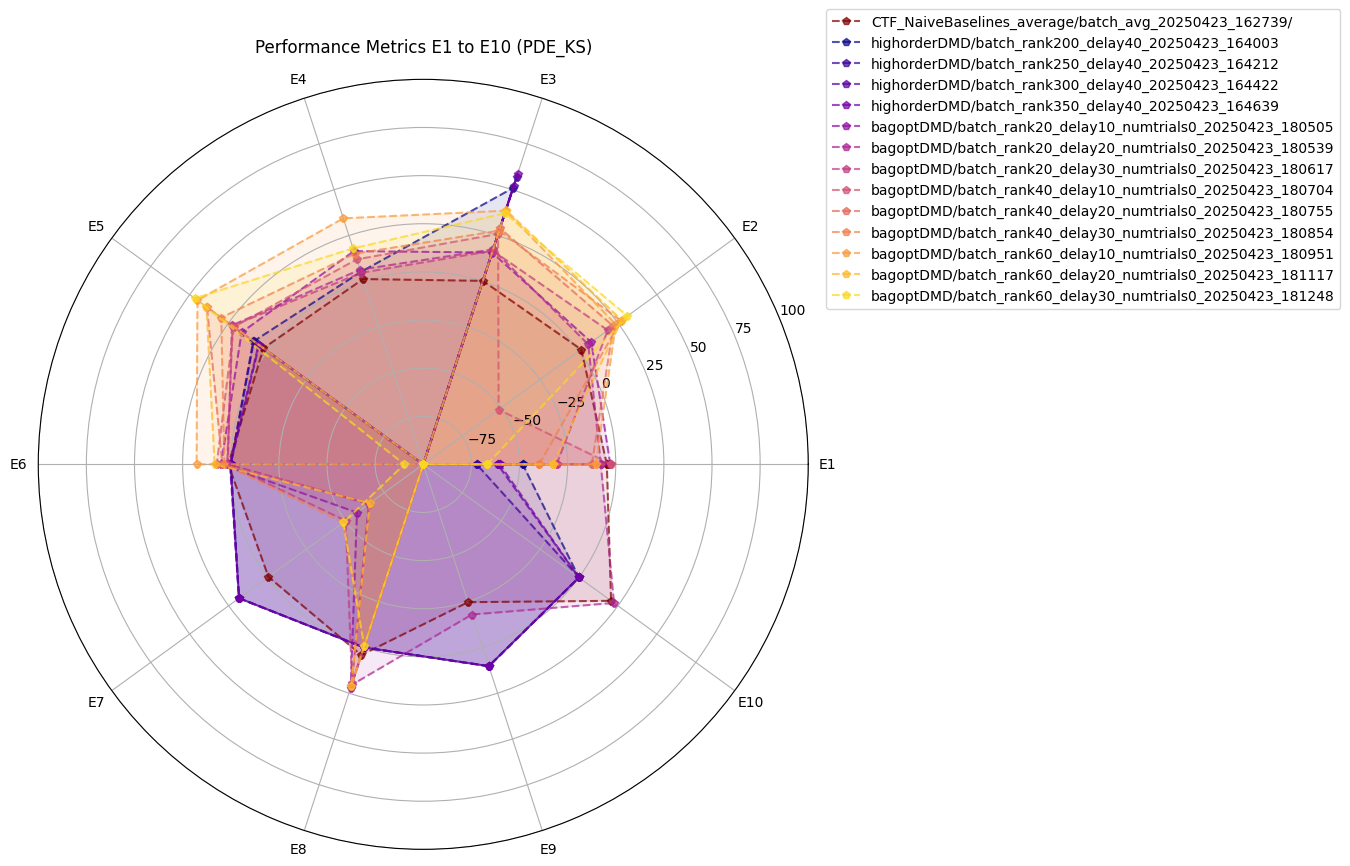

In [4]:
from matplotlib import cm
import matplotlib.pyplot as plt

def spider_plot(results, baseline_batches, model_batches, dataset_name,
                baseline_colormap = cm.jet_r, model_colormap = cm.plasma):

    categories = [f"E{i+1}" for i in range(10)]
    N = len(categories)

    # Create full batch paths
    all_batches = baseline_batches + model_batches
    
    # Generate colors for each batch
    baseline_colors = [baseline_colormap(i / len(baseline_batches)) for i in range(len(baseline_batches))]
    model_colors = [model_colormap(i / len(model_batches)) for i in range(len(model_batches))]
    colors = baseline_colors + model_colors

    # Create the figure and polar subplot
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection="polar"))

    # Plot each batch
    for i, batch_path in enumerate(all_batches):
        # Retrieve metrics (assuming results uses full paths as keys)
        values = list(results[str(batch_path)].values())
        # Close the plot by repeating the first value
        values += values[:1]
        # Calculate angles for the categories
        angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
        angles += angles[:1]

        # Check values
        values = [v if v > -100 else -100 for v in values]
        
        # Plot the line and fill the area
        ax.plot(angles, values, label=all_batches[i], color=colors[i], alpha=0.7, marker='p', linestyle='--')
        ax.fill(angles, values, color=colors[i], alpha=0.1)
        
    # Set category labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    
    # Set y-axis limits (assuming metrics are percentages; adjust if needed)
    ax.set_ylim(-100, 100)
    
    # Add a legend outside the plot
    ax.legend(loc="upper right", bbox_to_anchor=(1.7, 1.1))
    
    # Add a title
    ax.set_title(f"Performance Metrics E1 to E{N} ({dataset_name})", pad=20)
    
    # Display the plot
    plt.show()

spider_plot(results, baseline_batches, model_batches, dataset_name)